# TITANIC SURVIVAL PROJECT

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 

%matplotlib inline

In [5]:
train = pd.read_csv(r"C:\Users\mahes\Downloads\titanic_train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our analysis will incorporate variables such as Name, Sex, Age, and Pclass to determine the survival status of individuals. 

However, before we proceed, it's crucial to preprocess our data to identify and eliminate irrelevant features that won't contribute to our prediction. For instance, attributes like Name and PassengerID may not have any significant impact on the survival outcome and hence, might be dropped from our dataset.

This process of feature selection will be carried out post data visualization.


# Exploratory Data Analysis (EDA)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Heatmap

<AxesSubplot:>

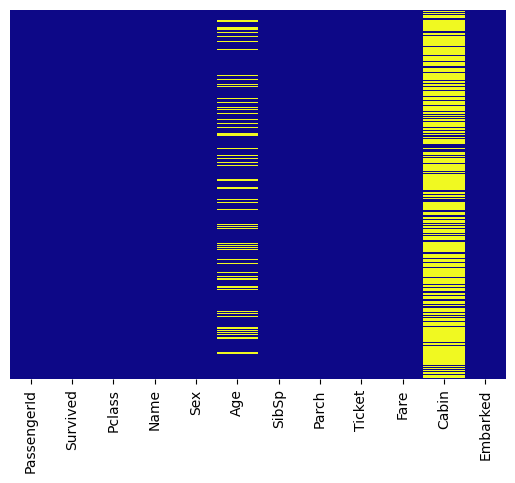

In [11]:
# using seaborn
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'plasma', cbar = False)

# Countplot

Now, here the missing values can be visualized very clearly. Hence, this method is more proficient for presentations stuff at industry level.

<AxesSubplot:xlabel='Survived', ylabel='count'>

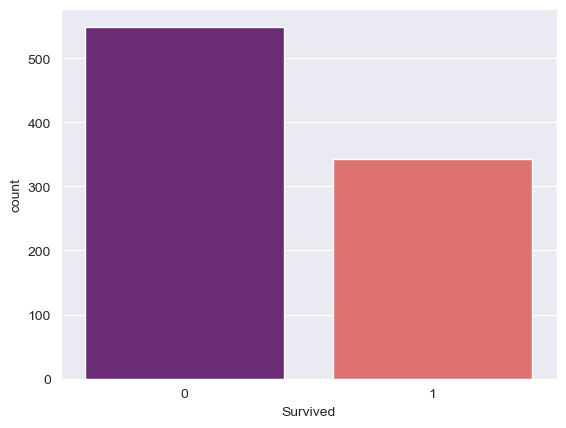

In [14]:
# countplot for death and survival rate
sns.set_style("darkgrid")
sns.countplot(x = "Survived", data = train, palette = 'magma')

<AxesSubplot:xlabel='Sex', ylabel='count'>

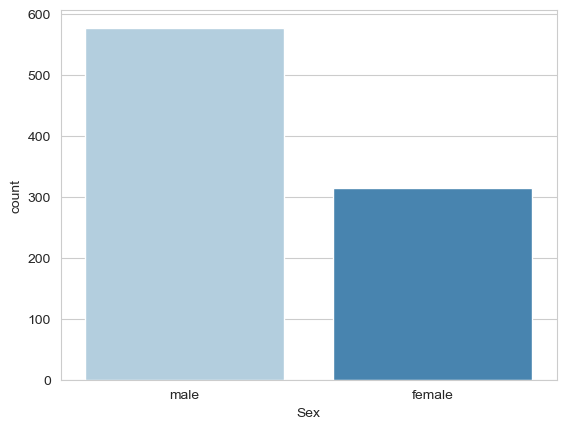

In [21]:
# countplot for male and female
sns.set_style('whitegrid')
sns.countplot(x = "Sex", data = train, palette = 'Blues')

<AxesSubplot:xlabel='Survived', ylabel='count'>

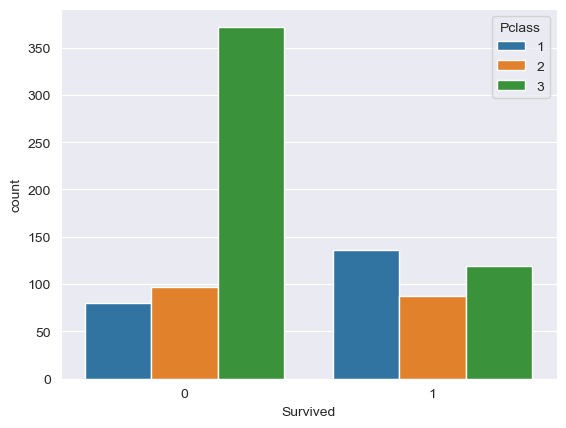

In [23]:
# countplot for people died against Pclass
sns.set_style('darkgrid')
sns.countplot(x = "Survived", hue = 'Pclass', data = train)

# Histogram

<AxesSubplot:>

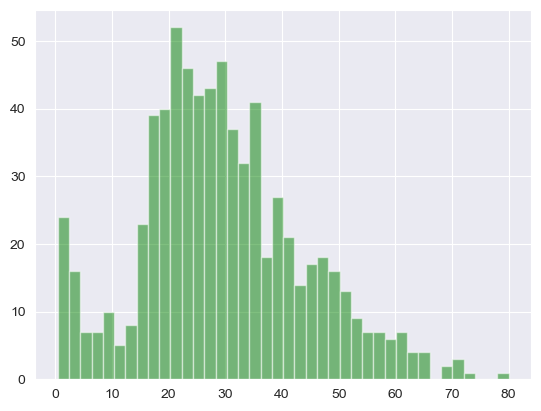

In [25]:
train['Age'].hist(bins=40, color='green', alpha=0.5)

<AxesSubplot:>

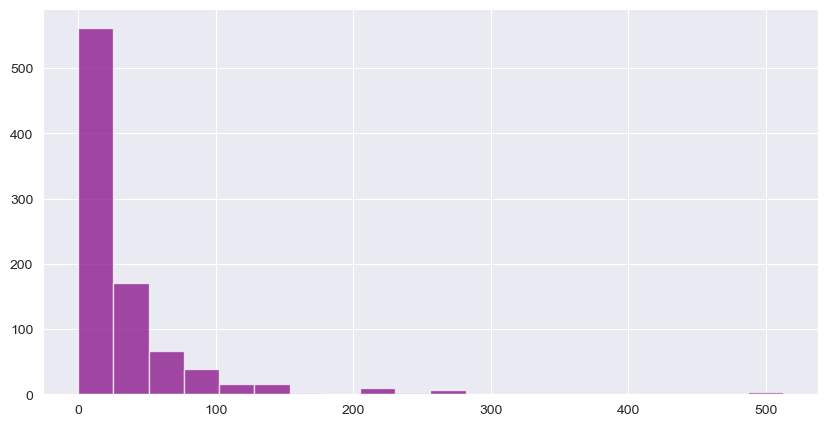

In [26]:
train['Fare'].hist(bins=20, color='purple', alpha = 0.7, figsize = (10, 5))

We're about to embark on the process of data refinement, which involves addressing the gaps in our dataset. As we've identified through our heatmap analysis, simply discarding these missing entries isn't an option due to the significant volume of data we'd lose.

The strategy we'll employ to handle these missing values is known as imputation, which involves substituting them with average values. This way, we preserve as much data as possible while ensuring its completeness.

Getting the average age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

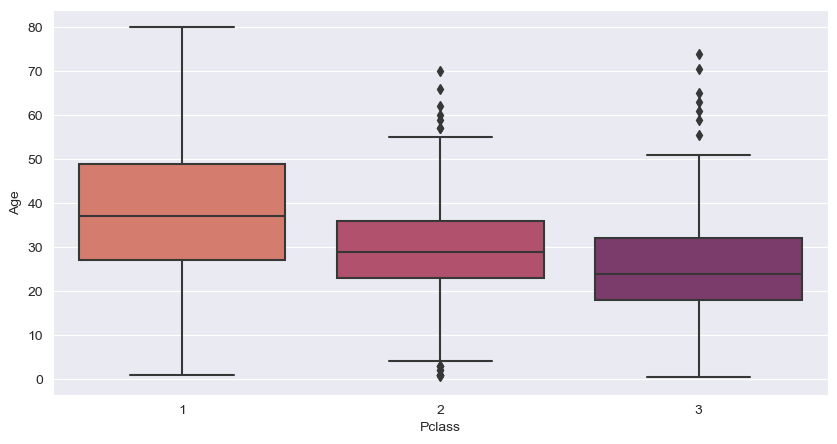

In [27]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'flare')

we have average age as:

1st class ==> 37
2nd class ==> 28
3rd class ==> 25

We're about to create a function that will substitute all the missing values for a specific PClass with the average age within that class.

# Inputing Average Age

In [28]:
def impute_age(cols):
    # we will pass 2 cols as arguments, col at 0 index will be for age and col at 1 index will be for Pclass
    Age = cols[0]
    Pclass = cols[1]
    
    # getting null values
    if pd.isnull(Age):
        # returning avg. age (37) for 1st Class
        if Pclass == 1:
            return 37
        # for 2nd class age (28)
        elif Pclass == 2:
            return 28
        # for 3rd class age (25)
        else:
            return 25
    else:
        return Age

In [29]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

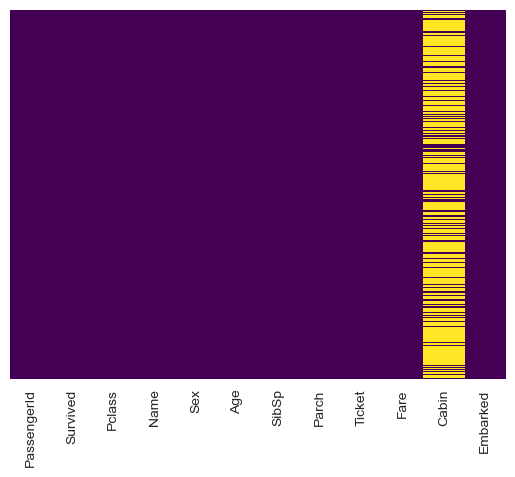

In [30]:
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

Dropping unnecessary columns
Such that: Name, Cabin, PassengerID etc

In [31]:
train.drop('Cabin', inplace = True, axis = 1)

<AxesSubplot:>

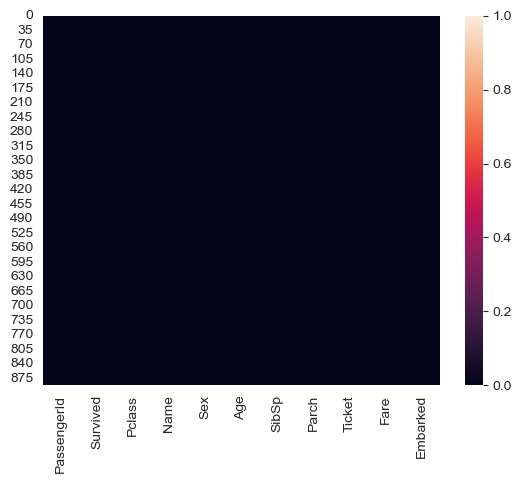

In [32]:
sns.heatmap(train.isnull())

In [33]:
train.shape

(891, 11)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting Categorcial Features

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


The presence of 4 object types indicates that we have four categorical variables in string format that need to be converted into numerical values. However, the 'Names' and 'PassengerID' fields are not relevant to the survival outcome of a passenger, so we won't be including them in this conversion process.

In [36]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [37]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [38]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [39]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


# Concat Numerical Values

Next step is to combine or concatenate the features that we just converted from categorical to numerical.

In [40]:
train = pd.concat([train, sex, embark], axis = 1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


# Building Logistic Regression Model


# Machine Learning Model

Following the same approach, we'll divide the data into two subsets, namely, the train set and the test set.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Y = train['Survived'] 

In [43]:
X = train.drop(['Survived'], axis=1)

In [44]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,25.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

# Training and Prediction via Model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logReg = LogisticRegression()

In [48]:
# training our Logistic Regression Model here
logReg.fit(X_train, Y_train)

C:\Users\mahes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# making predictions on Testing data
predictions = logReg.predict(X_test)

# Evalutaion

In [50]:
from sklearn.metrics import classification_report

In [52]:
# using actual testing data and the predictions our Model just made
print(classification_report(Y_test, predictions)) # getting accuracy

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



# Making a .csv File of the Project

In [53]:
pred = logReg.predict(X)

In [54]:
pred.shape

(891,)

In [55]:
X.shape

(891, 9)

In [56]:
submission = pd.DataFrame({
    'PassengerId' : X['PassengerId'],
    'Survived' : pred
})

In [57]:
submission.head

<bound method NDFrame.head of      PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         0
887          888         1
888          889         1
889          890         0
890          891         0

[891 rows x 2 columns]>

# Converting DataFrame into .csv File

In [58]:
submission.to_csv('Titanic-Survival-Project.csv')